In [143]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [144]:
Di = [0.782, 0.788, 0.786, 0.781, 0.781, 0.783, 0.780, 0.785]
for i in range(len(Di)):
    Di[i] -= -0.005
D = np.mean(Di)
print(Di)
print(D)


D /= 1000
H = 88.12 / 100
L = 39.95 / 100
b = 8.50 / 100
g = 9.8012
pi = 3.14159

[0.787, 0.793, 0.791, 0.786, 0.786, 0.788, 0.785, 0.79]
0.78825


x_bar = 5.5
y_bar = 1.0010000000000001

r = 0.9997117808120066
k = 0.18393939393939393
a = -0.010666666666666602
E = 180892001681.55722


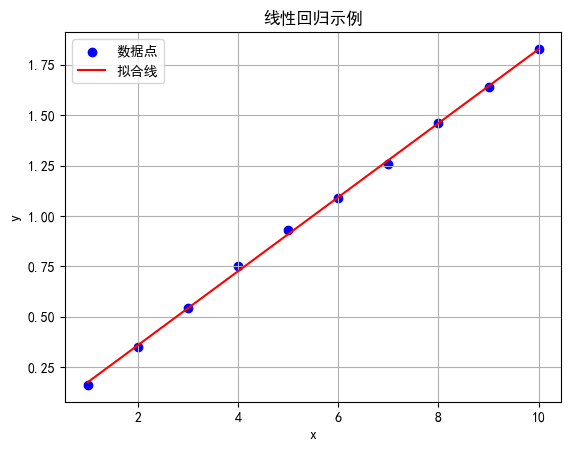

In [145]:
# 设置支持中文的字体
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 使用黑体
plt.rcParams["axes.unicode_minus"] = False  # 用来正常显示负号

# 数据初始化
x = range(1, 11)
y = [0.91, 1.10, 1.29, 1.50, 1.68, 1.84, 2.01, 2.21, 2.39, 2.58]

# 进行调整
for i in range(len(y)):
    y[i] -= 0.75

# 计算平均值
x_bar = np.mean(x)
y_bar = np.mean(y)
print("x_bar = {}\ny_bar = {}\n".format(x_bar, y_bar))

# 计算相关系数
pccs = np.corrcoef(x, y)
r = pccs[0, 1]
print("r = {}".format(r))

# 线性回归计算
k = np.sum((x - x_bar) * (y - y_bar)) / np.sum((x - x_bar) ** 2)
a = y_bar - k * x_bar
print("k = {}\na = {}".format(k, a))

k /= 100
E = 16 * g * L * H / (pi * D**2 * b * k)
print("E = {}".format(E))

# 绘制图形
plt.scatter(x, y, color="blue", label="数据点")  # 绘制散点图
plt.plot(x, 100 * k * np.array(x) + a, color="red", label="拟合线")  # 绘制回归线

# 设置图形标题和标签
plt.title("线性回归示例")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

# 显示图形
plt.show()

In [146]:
def mu(x, delta=0):
    mu_a = np.sqrt(np.sum((x - np.mean(x)) ** 2) / (len(x) * (len(x) - 1)))
    mu_b = delta / np.sqrt(3)
    mu = np.sqrt(mu_a**2 + mu_b**2)
    print("mu_a = {}\nmu_b = {}\nmu = {}".format(mu_a, mu_b, mu))
    return mu_a, mu_b, mu


mu(Di, 0.001)
print(np.sqrt((1.2165e-3) ** 2 + (5.7735e-4) ** 2))

mu_a = 0.000995525704626169
mu_b = 0.0005773502691896258
mu = 0.0011508278593711414
0.0013465531079389329


In [147]:
print(k * np.sqrt(1 / (8) * (1 / (r**2) - 1)))

x2_bar = 0
for i in range(10):
    x2_bar += x[i] ** 2
x2_bar /= 10

print(x2_bar)
print(x_bar)
print(0.025 / np.sqrt(3) * np.sqrt(1 / (10 * (x2_bar - x_bar**2))))
print(np.sqrt(1.5617e-5**2 + 1.5891e-5**2))

1.5617089365734674e-05
38.5
5.5
0.0015891043154093207
2.2280362878552944e-05


In [148]:
def test(x):
    sum = 0
    for i in x:
        sum += i**2
    return np.sqrt(sum)


print(
    test(
        [
            0.1732 / L / 100,
            0.2887 / H / 100,
            2 * 1.1508e-3 / D / 1000,
            0.01155 / b / 100,
            2.2280e-5 / k / 100,
        ]
    )
)
print(
    test(
        [
            0.1732 / L / 100,
            0.2887 / H / 100,
            2 * 1.1508e-3 / D / 1000,
            0.01155 / b / 100,
            2.2280e-5 / k / 100,
        ]
    )
    * E
    * 1e-11
)

0.006317930549937943
0.01142863103663336


### 转动惯量测量实验

In [149]:
m1 = np.mean([1108.84, 1108.85, 1108.82])
m2 = np.mean([1104.48, 1104.49, 1104.45])
m3 = np.mean([1039.05, 1039.07, 1039.07])

print("m1 = {}\nm2 = {}\nm3 = {}".format(m1, m2, m3))

t0 = np.mean([8.218, 8.214, 8.217, 8.207, 8.201]) / 10
t1 = np.mean([15.610, 15.585, 15.589, 15.625, 15.593]) / 10
t2 = 19.667 / 10
t3 = 12.255 / 10
t4 = 19.204 / 10

print("t0 = {}\nt1 = {}\nt2 = {}\nt3 = {}\nt4 = {}".format(t0, t1, t2, t3, t4))

m1 = 1108.8366666666664
m2 = 1104.4733333333334
m3 = 1039.0633333333333
t0 = 0.8211400000000001
t1 = 1.5600399999999999
t2 = 1.9667000000000001
t3 = 1.2255
t4 = 1.9204


In [150]:
I0 = 1 / 8 * 1.10884 * 0.1001**2
K = 4 * pi**2 * I0 / (t1**2 - t0**2)
K = 4 * 3.141593**2 * 1.3882e-3 / (1.56004**2 - 0.82114**2)
K = 3.11483e-2
I0 = 0.82114**2 * K / (4 * 3.141593**2)

c = 1.3882e-3 / (1.56004**2 - 0.82114**2)
I2 = c * (1.9667**2 - 0.82114**2)
I3 = c * (1.2255**2)
I4 = c * (1.9204**2)
print("K = {}\nI0 = {}\nI2 = {}\nI3 = {}\nI4 = {}".format(K, I0, I2, I3, I4))
I2 = 2.520e-3
I3 = 1.185e-3
I4 = 2.910e-3

K = 0.0311483
I0 = 0.0005319966935048179
I2 = 0.002519763804686074
I3 = 0.0011849520551121548
I4 = 0.0029097624959042545


In [151]:
J2 = 1 / 2 * 1.10447 * ((0.1001 / 2) ** 2 + (0.09414 / 2) ** 2)
J3 = 2 / 5 * 1.03906 * (0.1101 / 2) ** 2
J4 = 1 / 12 * 0.11504 * 0.5362**2

J2 = 2.607e-3
J3 = 1.260e-3
J4 = 2.756e-3
print("J2 = {}\nJ3 = {}\nJ4 = {}".format(J2, J3, J4))

n2 = abs(I2 - J2) / J2 * 100
n3 = abs(I3 - J3) / J3 * 100
n4 = abs(I4 - J4) / J4 * 100
print("n2 = {:.3f}%\nn3 = {:.3f}%\nn4 = {:.3f}%".format(n2, n3, n4))

J2 = 0.002607
J3 = 0.00126
J4 = 0.002756
n2 = 3.337%
n3 = 5.952%
n4 = 5.588%


In [152]:
l = 0.1732 / 39.95
h = 0.2887 / 88.12
d = 2 * 1.1508e-3 / 0.78825
b = 0.01155 / 8.50
k = 2.2280e-5 / 0.183939
e = 0.00631791

ll = l**2 / e**2 * 100
hh = h**2 / e**2 * 100
dd = d**2 / e**2 * 100
bb = b**2 / e**2 * 100
kk = k**2 / e**2 * 100

print(
    "l={:.5f}\nh={:.5f}\nd={:.5f}\nb={:.5f}\nk={:.5f}".format(
        1000 * l, 1000 * h, 1000 * d, 1000 * b, 1000 * k
    )
)
print(
    "ll={:.3f}%\nhh={:.3f}%\ndd={:.3f}%\nbb={:.3f}%\nkk={:.3f}%".format(
        ll, hh, dd, bb, kk
    )
)
print(ll + hh + dd + bb + kk)

l=4.33542
h=3.27621
d=2.91989
b=1.35882
k=0.12113
ll=47.089%
hh=26.890%
dd=21.359%
bb=4.626%
kk=0.037%
100.00065068811931
